# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [98]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# Libraries for data preparation and model building
#import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

- Firstly we imported the libriries we will be using on our notebook

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df=pd.read_csv('df_train.csv')

df.head()


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


- With the above code we firstly loaded our train data csv file then we displayed our table,we observe that our table has 49 columns but because 
with the .head() method we cannot see all of features we will use other methods to discover more from our table.

In [3]:
df_test =pd.read_csv('df_test.csv')

In [4]:
print(f'Train data shape: {df.shape}  |  Test data shape: {df_test.shape}')

Train data shape: (8763, 49)  |  Test data shape: (2920, 48)


- We loaded our test data csv file wich contains the features we will use to test our model. then we went on to print out the shapes of both our tables
to see how they both look and we discovered that our train data table has 8763 rows and 49 columns, and the test data table has 2920 rows and 48 columns.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   float64
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

- To get a quick overview of the dataset the dataframe.info() function is used to get a concise summary of the dataframe. 
- As we can see in the output, the summary includes list of all columns with their data types and the number of non-null values in each column.
- The datatype 'object' indicates that the columns time, Valencia wind deg, and Seville pressure are non-numeric.

In [75]:
df.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [76]:
df_test.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

- To get the count of missing values in each column of a our dataframe, we used the pandas isnull() and sum() functions together.
- It is discovered that Valencia_pressure has 2068 NaN values.We will fill up these missing values using either mean or median in the feature 
 engineering section of the notbook.

In [10]:
# look at data statistics
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [11]:
df['load_shortfall_3h'].describe()

count     8763.000000
mean     10673.857612
std       5218.046404
min      -6618.000000
25%       7390.333333
50%      11114.666667
75%      14498.166667
max      31904.000000
Name: load_shortfall_3h, dtype: float64

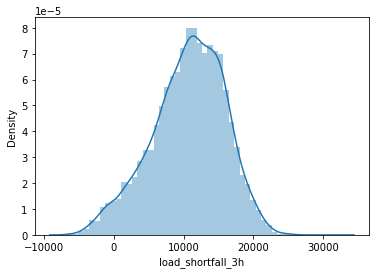

In [12]:
#histogram
sns.distplot(df['load_shortfall_3h']);

- First we are going to analyse our target market.."load_shortfall_3h".
- On our summary seems like we have negetives and we can guess it id due to some outliers

In [13]:
#skewness and kurtosis
print("Skewness: %f" % df['load_shortfall_3h'].skew())
print("Kurtosis: %f" % df['load_shortfall_3h'].kurt())

Skewness: -0.384847
Kurtosis: -0.118999


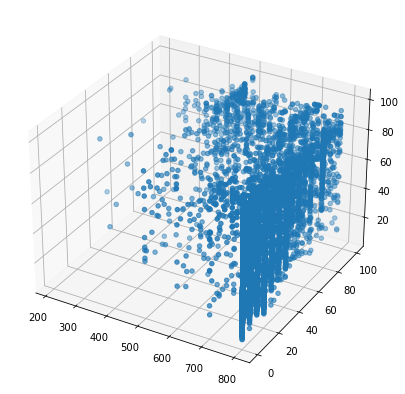

In [16]:
# plot relevant feature interactions
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

# scatter plot with response variable and 2 predictors
ax.scatter(df['Madrid_weather_id'], df['Madrid_clouds_all'], df['Madrid_humidity'])

<AxesSubplot:xlabel='Madrid_pressure'>

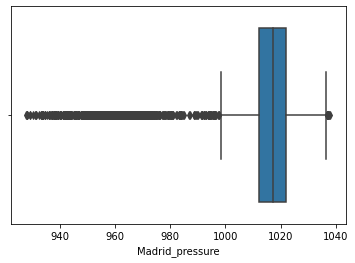

In [17]:
#Boxplot
sns.boxplot(df.Madrid_pressure)

_ WE can easily spot outliers on with the above boxplot

In [68]:
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Valencia_wind_deg         -1.192548
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_pressure          -1.155787
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10

-  From the kertosis we can identify outliers namely Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Barcelona_rain_3h and Valencia_snow_3h,
              Madrid_weather_id, Barcelona_weather_id and Seville_weather_id 

<AxesSubplot:>

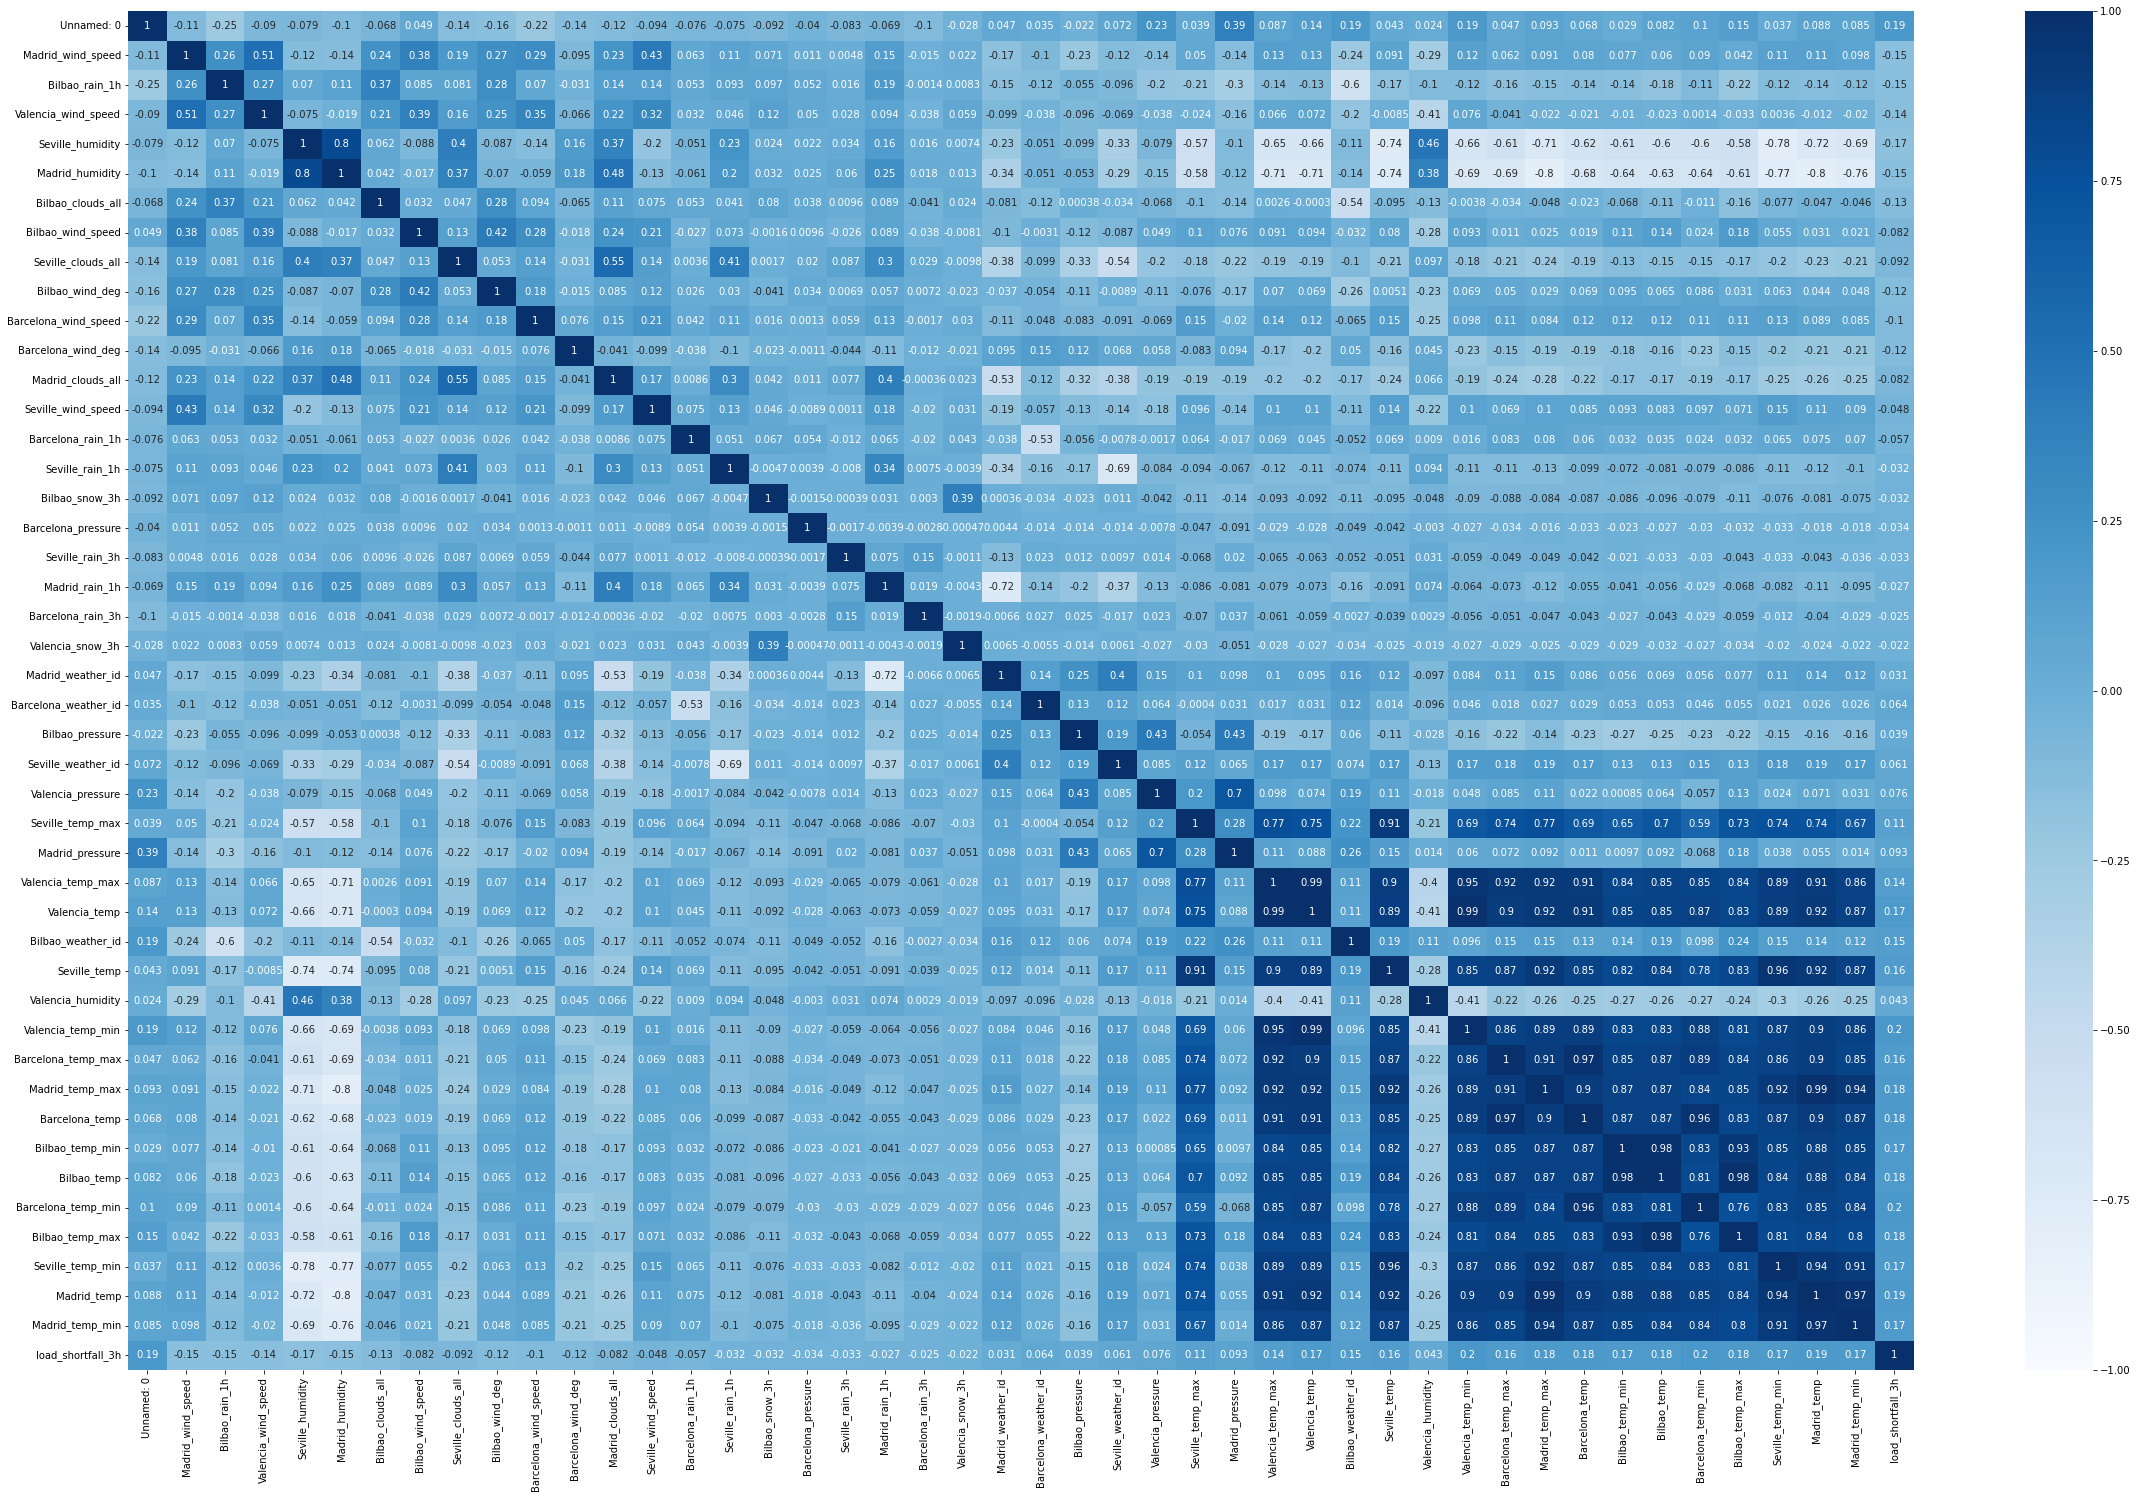

In [19]:
# evaluate correlation
df_corr = df.corr()

# Plot the matrix
plt.figure(figsize=(40,25))
sns.heatmap(df_corr,annot=True, vmin=-1, vmax=1, cmap='Blues')

- With the above heatmap we can also see the features wich are in high correlation (in dark blue) on the heatmap at the bottom right corner of our graph

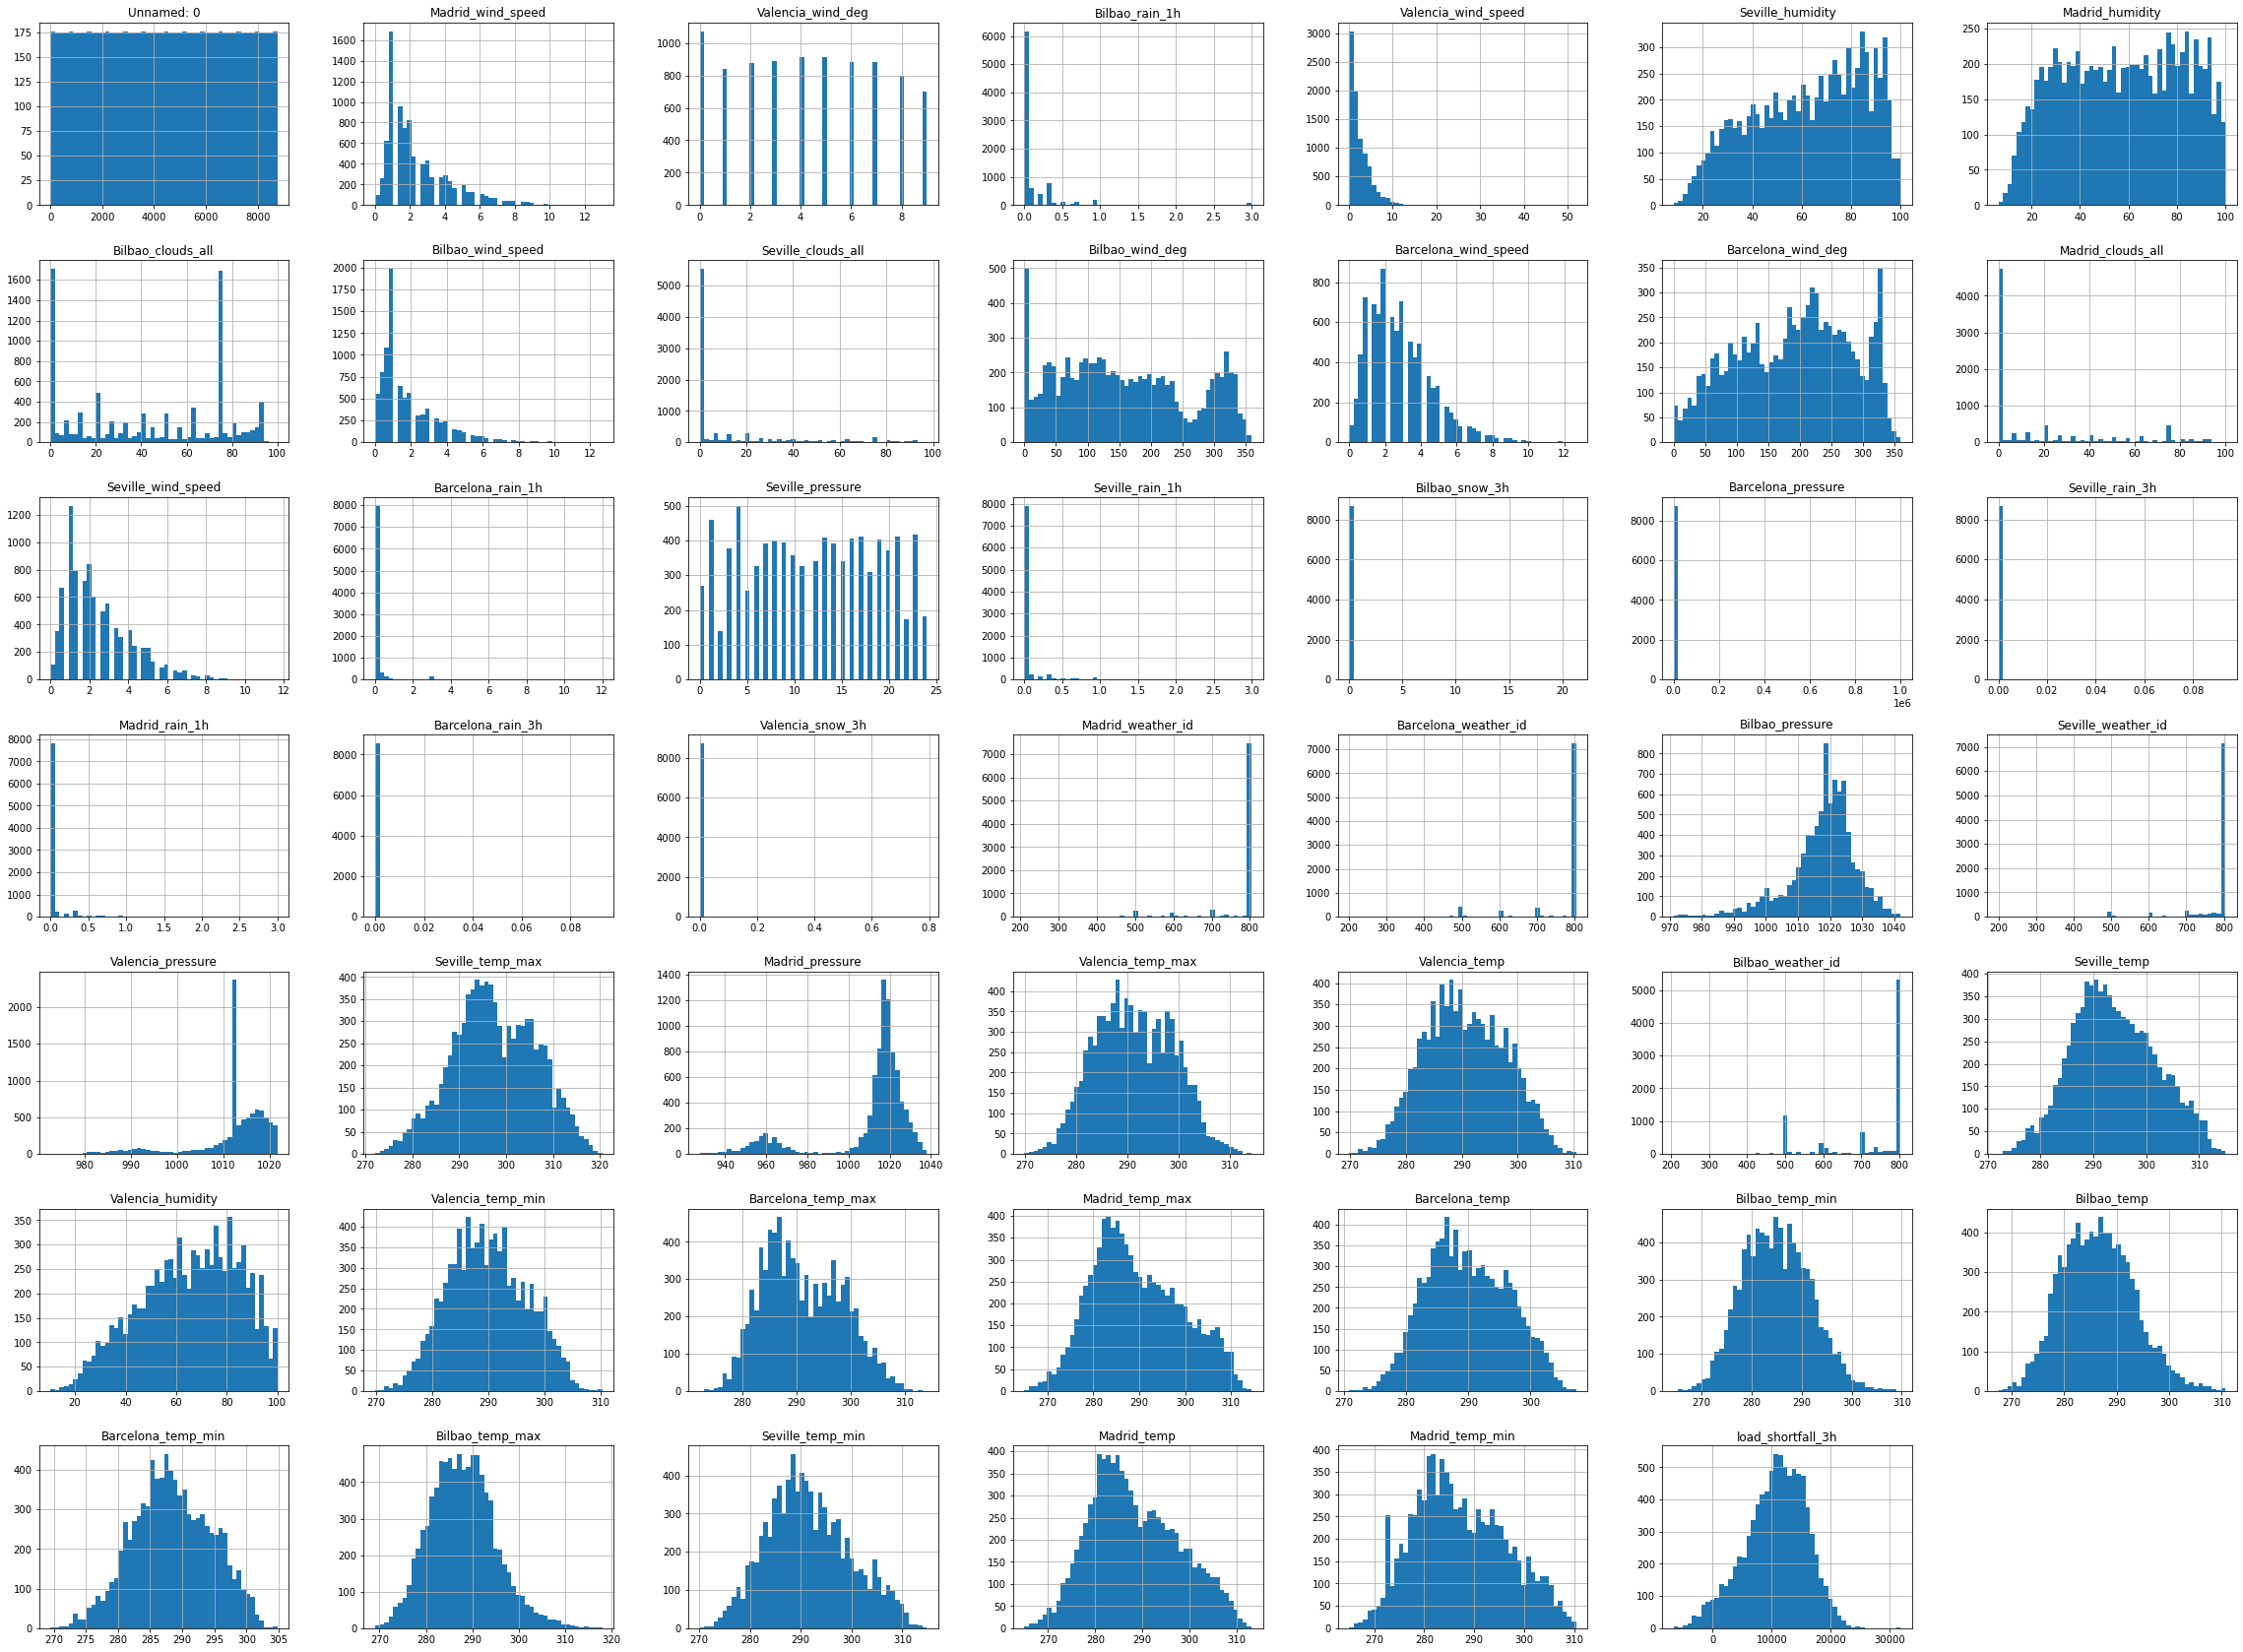

In [73]:
# have a look at feature distributions
df.hist(bins=50, figsize=(40,30), color = 'tab:blue')
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [22]:
# remove missing values/ features
#df.drop(['time'] , axis=1 , inplace=True)
#df.drop(['time'] , axis=1 , inplace=True)

df_train.drop(['Unnamed: 0'] , axis=1 , inplace=True)
df_test.drop(['Unnamed: 0'] , axis=1 , inplace=True)

- We deleted the unnamed column from both tables as we have no use of it as it is completelty identical to the index column

In [70]:
df["Valencia_pressure"] = df["Valencia_pressure"].replace(np.NaN, df["Valencia_pressure"].mean())
print(df["Valencia_pressure"])

0       1002.666667
1       1004.333333
2       1005.333333
3       1009.000000
4       1012.051407
           ...     
8758    1012.051407
8759    1021.000000
8760    1009.666667
8761    1020.000000
8762    1012.051407
Name: Valencia_pressure, Length: 8763, dtype: float64


In [71]:
df_test["Valencia_pressure"] = df_test["Valencia_pressure"].replace(np.NaN, df_test["Valencia_pressure"].mean())
print(df_test["Valencia_pressure"])

0       1013.148351
1       1013.148351
2       1013.148351
3       1013.148351
4       1013.148351
           ...     
2915    1013.148351
2916    1013.148351
2917    1013.148351
2918    1013.148351
2919    1013.148351
Name: Valencia_pressure, Length: 2920, dtype: float64


In [ ]:
AS 

In [23]:
df.head()


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [24]:
# create new features

In [25]:
# engineer existing features
#features are converted to ordinal integers
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df.Valencia_wind_deg = enc.fit_transform(df[['Valencia_wind_deg']])
df.Seville_pressure = enc.fit_transform(df[['Seville_pressure']])
df_test.Valencia_wind_deg = enc.fit_transform(df[['Valencia_wind_deg']])
df_test.Seville_pressure = enc.fit_transform(df[['Seville_pressure']])

- We used the OrdinalEncoder method to convert our categorcal data to numeric

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

- We split the data into train and test, where in we used the train data for training our model and the test data on testing it.
- we will first Build a Linear Regression model which would serve as our base model using the train data.
- we will try and improve the linear model by employing Lasso, Ridge and then try out other models like decision tree and Random Forest and SVR

In [27]:
# split data
# Target Variable
y = df.iloc[:,-1]
#Features
X = df.drop(['load_shortfall_3h'], axis=1)


We have split our data into 80% for training and the remaining 20% for testing i.e test_size = 0.2

In [94]:
# create targets and features dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

- Linear Regresson Model

In [95]:
lm = LinearRegression()
#Fit the model into training set
lm.fit(X_train, y_train)

#predict on unseen data
predict = lm.predict(X_test)

- Ridge Regression Model

In [99]:
# Creating Ridge model
Ridge = Ridge()
# Train the model
Ridge.fit(X_train, y_train)
# Get predictions
Ridge_pred = Ridge.predict(X_test)


- Lasso Reggression Model

In [100]:

lasso = Lasso(alpha=0.01)
lasso.fit(X,y)

Lasso(alpha=0.01)

In [101]:
# evaluate one or more ML models
# Extract the intercept, or y-cut, of our linear model
a = float(lasso.intercept_)

In [102]:
# Extract the coefficient, or gradient, of our  model
b = lasso.coef_

In [103]:
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

Slope:		 [ 1.15376851e-01 -2.57726435e+02 -2.85849633e+01 -3.78111359e+02
 -9.71040673e+01 -3.81482641e+01  3.21424369e+00 -6.20988537e+00
 -8.19397535e+01  2.71788253e+00 -2.33848510e+00 -5.66544585e+01
 -2.84091340e+00  9.97337760e+00 -8.67593719e+00 -1.50995384e+02
  5.46448917e+00  6.53899726e+02  1.42180560e+02 -5.47523415e-03
 -3.79343851e+04  3.50320635e+02 -2.14063985e+04 -5.75973916e+03
 -3.96854801e-01  1.32892688e+00  2.82106181e+00  1.22764184e+00
  1.99535893e+01 -1.76555191e+02  7.68209002e+00 -2.41059667e+02
 -2.03910299e+02  1.03753450e+00  3.64405068e+02  1.58934323e+01
  4.87922212e+02 -1.18055466e+02 -2.25894212e+02  4.35491202e+02
  4.33824904e+02 -7.95649608e+02 -2.03645198e+02  3.82221917e+02
 -2.83754863e+02  4.81145929e+02 -2.20120146e+02]
Intercept:	 -52515.59270421038


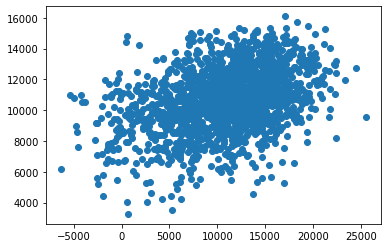

In [104]:

predictions = lasso.predict(X_test)
plt.scatter(y_test,predictions)

- Random Forest Model

In [105]:
#Random Forest Model

random_fst = RandomForestRegressor(n_estimators=100, max_depth=5)
random_forest = random_fst.fit(X ,y )
# Get predictions
rf_pred = random_forest.predict(X_test)

- Decision tree model

In [ ]:
#Decision tree model
from sklearn.tree import DecisionTreeRegressor
Dec_tree = DecisionTreeRegressor()
# Fitting the model
Dec_tree.fit(X_train,y_train)
# Get predictions
Tree_pred = Dec_tree.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [107]:
# Compare model performance
import math
r_dict = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Ridge": (metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_squared_error(y_test,lasso_pred)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,rf_pred))}
                        
                    }

# create dataframe from dictionary
r = pd.DataFrame(data=r_dict)
r

,Test MSE
Decision Tree,2.428783e+07
Lasso,2.226353e+07
Linear model,2.226353e+07
Random Forest,1.808960e+07
Ridge,2.229357e+07


In [108]:
Model_Performance_dict = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,rf_pred))}
                        
                    }

# create dataframe from dictionary
results = pd.DataFrame(data=Model_Performance_dict)
results

,Test RMSE
Decision Tree,4928.268054
Lasso,4718.424085
Linear model,4718.424085
Random Forest,4253.187408
Ridge,4721.606765


- We tested our model by comparing the Root Mean Square Error across Models and also comparing Mean Square Error across Models.
- Based on the results of the perfomence testing it is evident that the Random Forest model outperforms the other models.

# Choose best model and motivate why it is the best choice
- From the above model perfomance testing we have seen that Random Forest has a lower RMSE as well as MSE for both the Training and Test data 
 as compared to the other models.
- We can therefore conclude that Random Forest is the best model to use for prediction of 3 hourly load shortfall in Spain

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

#Random Forest
- Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. 
- Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than
a single model
- Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, 
it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.
- Therefore, in random forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node. 
You can even make trees more random by additionally using random thresholds for each feature rather than searching for the best possible thresholds (like a normal decision tree does).